In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
import keras
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

11490434/11490434 [==============================] - 1s 0us/step
(28, 28)
(60000, 28, 28)


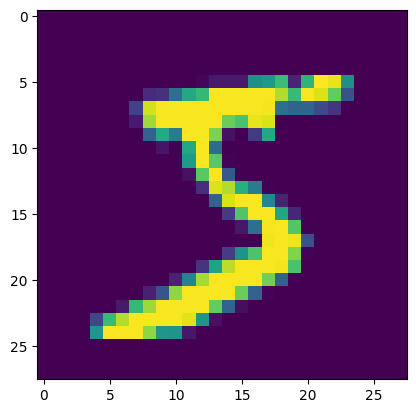

In [ ]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()
print(train_images[0].shape)
print(train_images.shape)
plt.imshow(train_images[0])

## preprocessing

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images.shape

(60000, 28, 28, 1)

In [ ]:
print(len(train_labels))
train_labels

60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_images = (train_images - 127.5) / 127.5 # Normalize the images to make pixels value between [-1, 1]

In [ ]:
BUFFER_SIZE = 60000#60k mean it will stor 60000 row in cash memory then shuffle it then itrat next if it 1250
BATCH_SIZE = 256#here we use batch to input data into NN as parts not all data set

#train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset = tf.data.Dataset.from_tensor_slices(train_images)


In [ ]:
# just to know defferince between from_tensor_slices and from_tensor
train_dataset_example = tf.data.Dataset.from_tensor_slices([
                                                              [[1,2,3],
                                                               [4,5,6]],
                                                              [[11,12,13],
                                                               [14,15,16]]
                                                               ])

# just to know defferince between from_tensor_slices and from_tensor
train_dataset_example2 = tf.data.Dataset.from_tensors([
                                                              [[1,2,3],
                                                               [4,5,6]],
                                                              [[11,12,13],
                                                               [14,15,16]]
                                                               ])

In [ ]:
for i in train_dataset_example:
  print(i)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[11 12 13]
 [14 15 16]], shape=(2, 3), dtype=int32)


In [ ]:
for i in train_dataset_example2:
  print(i)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[11 12 13]
  [14 15 16]]], shape=(2, 2, 3), dtype=int32)


## Creating DCGAN>>>Deep Convolutional GAN we will use Conv2d
### Ther is another GANS Like CGAN _ pix2pix _SRGAN_WGAN

In [ ]:
#create generator to take vector and make upsampling same unite algorithm to improve image resolution
#def make_generator_model():
#    model = tf.keras.Sequential()
#    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))#12544 neurns its fine tunnig if we make it small number will lose parts or information from image if we make it
#    model.add(tf.keras.layers.BatchNormalization())#take batch batch and normalize it to remove the vanshing gradient
#    model.add(tf.keras.layers.LeakyReLU())
#    #LeakyReLU mostly used with gans and it allow nonlinearty and minus value
#
#    model.add(tf.keras.layers.Reshape((7, 7, 256)))
#    # layers.Reshape to convert LeakyReLU vector output to image shape (7 *7 is image dimention ) 256 > is channels
#    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size
#    #asset None اثناء التدريب بيتغير بعدد الباتشز
#    #the batch size in input data is often left as None to indicate that it can be variable
#    #During training, you might process data in batches, and the batch size is usually determined at training runtime.
#    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
#    #128 > filter 5*5, stride (1,1) >>means the image resolution will improve with keep it in same size
#    #Same>> zero-padding will be added to the input so that the output has the same height and width as the input.
#    #Removing biases can sometimes make training more stable, especially when batch normalization layers are used. Batch normalization has a bias term itself, and this can interact with the biases in convolutional layers in ways that may complicate training.
#    assert model.output_shape == (None, 7, 7, 128)
#    model.add(tf.keras.layers.BatchNormalization())
#    model.add(tf.keras.layers.LeakyReLU())
#
#    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#    #strids is (2,2) thats dubling image size which mean
#    assert model.output_shape == (None, 14, 14, 64)
#    model.add(tf.keras.layers.BatchNormalization())
#    model.add(tf.keras.layers.LeakyReLU())
#
#    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
#    assert model.output_shape == (None, 28, 28, 1)
#
#    return model

In [ ]:
#def make_generator_model():
#    model = tf.keras.Sequential()
#    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
#    model.add(tf.keras.layers.BatchNormalization())
#    model.add(tf.keras.layers.LeakyReLU())
#
#    model.add(tf.keras.layers.Reshape((7, 7, 256)))
#
#    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
#    model.add(tf.keras.layers.BatchNormalization())
#    model.add(tf.keras.layers.LeakyReLU())
#
#    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#    model.add(tf.keras.layers.BatchNormalization())
#    model.add(tf.keras.layers.LeakyReLU())
#
#    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
#
#    return model
#

In [ ]:
# discriminator is NN Takes Real images and fake images and learning from them to predicte new fake image with probapilt between 0,1
#def make_discriminator_model():
#    model = tf.keras.Sequential()
#    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',input_shape=[28,28,1]))
#    model.add(tf.keras.layers.LeakyReLU())
#    model.add(tf.keras.layers.Dropout(0.3))
#
#    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
#    model.add(tf.keras.layers.LeakyReLU())
#    model.add(tf.keras.layers.Dropout(0.3))
#
#    model.add(tf.keras.layers.Flatten())#to convert downsampled image to vector befor dens layer
#    model.add(tf.keras.layers.Dense(1))#here dens layer is one neuron is its give us 0 or 1 >>fake or real image using segmoid function
#
#    return model

In [ ]:
#generator = make_generator_model()
#discriminator = make_discriminator_model()

In [ ]:
# #define The loss function for the generator and disciminator
# cross_entropy=keras.losses.BinaryCrossentropy(from_logits=True)#logits ofen store the dimensions of image also
# def generator_loss(fake_output):
#   return cross_entropy(tf.ones_like(fake_output),fake_output)

# def discriminator_loss(real_output,fake_output):
#   real_loss=cross_entropy(tf.ones_like(real_output),real_output)
#   fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
#   total_loss=real_loss+fake_loss
#   return total_loss

In [ ]:
# generator_optimizer = tf.optimizers.Adam(1e-4)  # exponent learning rate is 0.0001
# discriminator_optimizer = tf.optimizers.Adam(1e-4)
# # here its 2 optimizers and 2 loss function that as we have 2 neural network(generator and discriminator)

In [ ]:
# noise_dim = 100
# num_examples_to_generate = 16

# # We'll re-use this random vector used to seed the generator so
# # it will be easier to see the improvement over time.
# #random_vector_for_generation = tf.random.normal([num_examples_to_generate,noise_dim])
# random_vector_for_generation = tf.random.normal([BATCH_SIZE, noise_dim])

# random_vector_for_generation

<tf.Tensor: shape=(256, 100), dtype=float32, numpy=
array([[ 0.03402698, -0.6042526 , -1.3368438 , ..., -0.4357156 ,
         1.0628223 , -0.12111024],
       [ 1.4362351 , -0.00629319, -0.9819418 , ..., -0.7182752 ,
         2.1269052 ,  1.359205  ],
       [-1.3415477 , -1.0870843 ,  0.3531143 , ...,  1.5545821 ,
        -0.27994964,  1.9564958 ],
       ...,
       [ 1.1006382 , -0.29365695, -0.4025027 , ...,  0.2774751 ,
        -1.555499  , -0.69919246],
       [-1.3888583 ,  0.2152749 , -1.3959085 , ..., -0.07485926,
         1.1598939 ,  0.47366264],
       [-1.5911703 ,  0.63081956, -1.7709855 , ..., -0.35878074,
         1.5189954 , -1.1563233 ]], dtype=float32)>

In [ ]:
# #trainig step
# #تقوم بترتيب احداث الترانينج من خلال الفنكشن اللي بتمثل كل اتراشن
# #train step is an only one iteration compute generator and discriminator
# def train_step(images):
#     # Generating noise from a normal distribution
#     fake_img_noise = tf.random.normal([BATCH_SIZE, 100]).astype("float32")
#     #Fake imge and real images the 2 are distribution of pixels value and we try to reduce the loss or distance between them
#     # Convert input images to float32
#     #images = tf.cast(images, tf.float32)

#     with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
#         generated_images = generator(fake_img_noise, training=True)
#         real_output = discriminator(images, training=True)
#         generated_output = discriminator(generated_images, training=True)

#         gen_loss = generator_loss(generated_output)
#         disc_loss = discriminator_loss(real_output, generated_output)

#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

#     gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#     discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



# def train(dataset, epochs):
#     for epoch in range(epochs):
#       for images in dataset:
#         images = tf.cast(images , tf.dtypes.float32)
#         train_step(images)

# EPOCHS=20
# train(train_dataset, EPOCHS)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
import keras
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocessing
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
#train_images=train_images[:1000]
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))

    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))

    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

# Loss functions
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

generator_optimizer = tf.optimizers.Adam(1e-4)
discriminator_optimizer = tf.optimizers.Adam(1e-4)




In [ ]:
# Define initial accuracy variables
generator_accuracy = tf.Variable(0.0, trainable=False, dtype=tf.float32)
discriminator_accuracy = tf.Variable(0.0, trainable=False, dtype=tf.float32)


def compute_discriminator_accuracy(real_output, generated_output):
    # Your logic to compute discriminator accuracy goes here
    # This might involve comparing real_output and generated_output with ground truth labels

    # For example, if you are using a binary classification task:
    real_accuracy = tf.reduce_mean(tf.cast(real_output > 0.5, dtype=tf.float32))
    generated_accuracy = tf.reduce_mean(tf.cast(generated_output < 0.5, dtype=tf.float32))

    return (real_accuracy + generated_accuracy) / 2.0

# Training step
@tf.function
def train_step(images, generator_accuracy, discriminator_accuracy):
    fake_img_noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #Generator Starting
        generated_images = generator(fake_img_noise, training=True)#fake_img_noise is just noisy pixel not can be anything in pictur
        #training=True >>>means generator start to generat images

        #discriminator starting to train it self using generated_images and real_output
        real_output = discriminator(images, training=True)
        generated_output = discriminator(generated_images, training=True)

        # Update loss
        gen_loss = generator_loss(generated_output)
        disc_loss = discriminator_loss(real_output, generated_output)
        # Update accuracy
        #generator_accuracy.assign(compute_generator_accuracy(generated_output))
        discriminator_accuracy.assign(compute_discriminator_accuracy(real_output, generated_output))

    #gradient is get dervative to enhance adam optimazer
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) # zip to map every image with its gradient

    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Print loss and accuracy
    tf.print('Generator Loss:', gen_loss,'Discriminator Loss:', disc_loss,'Discriminator Accuracy:', discriminator_accuracy)




# Training loop
@tf.function(reduce_retracing=True)
def train(dataset, epochs):
    for epoch in range(epochs):
        for images in dataset:
            train_step(images, generator_accuracy, discriminator_accuracy)



EPOCHS = 20
train(train_dataset, EPOCHS)

Generator Loss: 0.70048517 Discriminator Loss: 1.40571737 Discriminator Accuracy: 0.5
Generator Loss: 0.689655066 Discriminator Loss: 1.35290408 Discriminator Accuracy: 0.5
Generator Loss: 0.676627755 Discriminator Loss: 1.31757152 Discriminator Accuracy: 0.50390625
Generator Loss: 0.669338465 Discriminator Loss: 1.26798904 Discriminator Accuracy: 0.52734375
Generator Loss: 0.660486579 Discriminator Loss: 1.2327987 Discriminator Accuracy: 0.6171875
Generator Loss: 0.651637912 Discriminator Loss: 1.19242477 Discriminator Accuracy: 0.84375
Generator Loss: 0.643457234 Discriminator Loss: 1.16540658 Discriminator Accuracy: 0.96875
Generator Loss: 0.641743541 Discriminator Loss: 1.12250257 Discriminator Accuracy: 0.998046875
Generator Loss: 0.639730811 Discriminator Loss: 1.09319746 Discriminator Accuracy: 1
Generator Loss: 0.646283627 Discriminator Loss: 1.05750966 Discriminator Accuracy: 1
Generator Loss: 0.653785884 Discriminator Loss: 1.01857674 Discriminator Accuracy: 1
Generator Loss:

# Saving and loading model

In [ ]:
# Save Generator model
generator.save('generator_model.h5')

# Save Discriminator model
discriminator.save('discriminator_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save GAN model
gan_model = keras.Sequential([generator, discriminator])
gan_model.save('gan_model.h5')

In [ ]:
#To load the models later, you can use tf.keras.models.load_model:

# Load Generator model
loaded_generator = tf.keras.models.load_model('generator_model.h5')

# Load Discriminator model
loaded_discriminator = tf.keras.models.load_model('discriminator_model.h5')

# Load GAN model
loaded_gan_model = tf.keras.models.load_model('gan_model.h5')


1/1 [==============================] - 0s 117ms/step


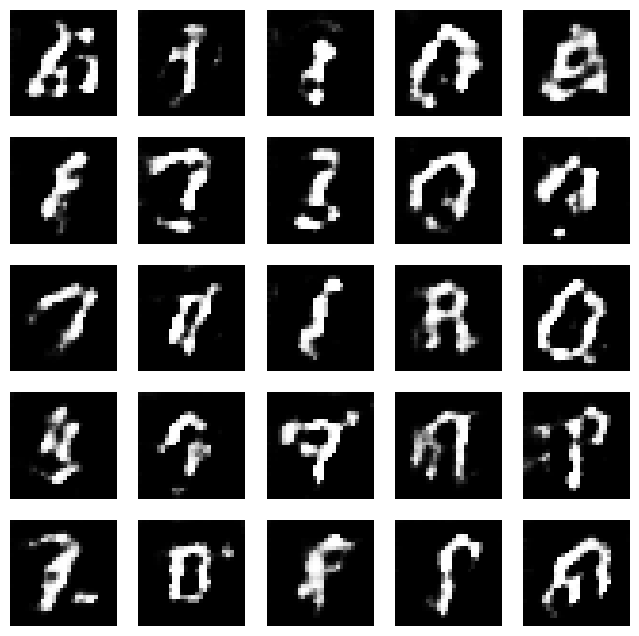

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np



# Generate images using random noise
num_images_to_generate = 25
noise = np.random.normal(0, 1, (num_images_to_generate, 100))
generated_images = generator.predict(noise)

# Rescale generated images to [0, 1]
generated_images = 0.5 * generated_images + 0.5

# Display the generated images in a grid
rows, cols = 5, 5
fig, axs = plt.subplots(rows, cols, figsize=(8, 8))
cnt = 0
for i in range(rows):
    for j in range(cols):
        axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        cnt += 1
plt.show()


1/1 [==============================] - 0s 32ms/step


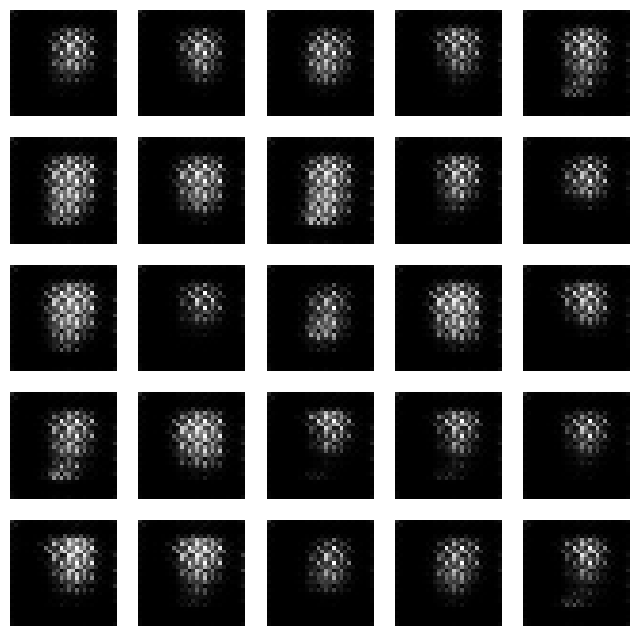

In [ ]:
# Generate images using random noise
num_images_to_generate = 25
noise = np.random.normal(0, 1, (num_images_to_generate, 100))
generated_images = generator.predict(noise)

# Rescale generated images to [0, 1]
generated_images = 0.5 * generated_images + 0.5

# Display the generated images in a grid
rows, cols = 5, 5
fig, axs = plt.subplots(rows, cols, figsize=(8, 8))
cnt = 0
for i in range(rows):
    for j in range(cols):
        axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
        axs[i, j].axis('off')
        cnt += 1
plt.show()